In [100]:
%pip install lightfm


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached lightfm-1.17.tar.gz (316 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_proces

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [81]:
### Loading and Understanding of Data

In [82]:
df = pd.read_csv("C:/Users/Admin/Desktop/JMD327_MainProject/JMD327_JElite/PythonScripts/DataEngineering/REPORT/report_data.csv")

In [83]:
df.head()

,EmployeeID,Firstname,Lastname,Designation,YearOfJoining,CourseName,Proficiency,SkillType,CertificateLink,ScoreObtained,ScoreCategory,Verified
0,JMD301,Donald,Phelps,Solution Enabler,2022,Cloud Security Basics,Basic,ASSESSMENT,NaN,99.0,Excellent,False
1,JMD301,Donald,Phelps,Solution Enabler,2022,Data Lakes and Big Data Systems,Advanced,ASSESSMENT,NaN,68.0,Average,True
2,JMD301,Donald,Phelps,Solution Enabler,2022,Data Science Fundamentals,Basic,CERTIFICATE,http://example.com/certificate/JMD301/37,NaN,NaN,True
3,JMD301,Donald,Phelps,Solution Enabler,2022,ETL Processes and Tools,Advanced,CERTIFICATE,http://example.com/certificate/JMD301/29,NaN,NaN,True
4,JMD302,Karen,Lee,Solution Enabler,2022,HTML5 Fundamentals,Basic,CERTIFICATE,http://example.com/certificate/JMD302/15,NaN,NaN,True


In [84]:
df.tail()

,EmployeeID,Firstname,Lastname,Designation,YearOfJoining,CourseName,Proficiency,SkillType,CertificateLink,ScoreObtained,ScoreCategory,Verified
116,JMD320,Robert,Carpenter,IT Support,2021,Cloud Security and Compliance,Basic,CERTIFICATE,http://example.com/certificate/JMD320/59,NaN,NaN,False
117,JMD320,Robert,Carpenter,IT Support,2021,Advanced ETL Design and Optimization,Intermediate,ASSESSMENT,NaN,69.0,Average,False
118,JMD320,Robert,Carpenter,IT Support,2021,Web Performance Optimization,Basic,CERTIFICATE,http://example.com/certificate/JMD320/24,NaN,NaN,True
119,JMD320,Robert,Carpenter,IT Support,2021,Big Data and Distributed Systems,Intermediate,CERTIFICATE,http://example.com/certificate/JMD320/33,NaN,NaN,True
120,JMD320,Robert,Carpenter,IT Support,2021,Python for Web Scraping,Advanced,CERTIFICATE,http://example.com/certificate/JMD320/8,NaN,NaN,False


In [85]:
# Step 2: Data Preprocessing
df["ScoreObtained"] = pd.to_numeric(df["ScoreObtained"], errors="coerce")
df["Verified"] = df["Verified"].astype(bool)

# Handle missing values
df.fillna({"ScoreObtained": 0}, inplace=True)


In [86]:
print(df.describe())


       YearOfJoining  ScoreObtained
count     121.000000     121.000000
mean     2022.322314      31.413223
std         1.285917      37.304305
min      2020.000000       0.000000
25%      2022.000000       0.000000
50%      2022.000000       0.000000
75%      2024.000000      70.000000
max      2024.000000      99.000000


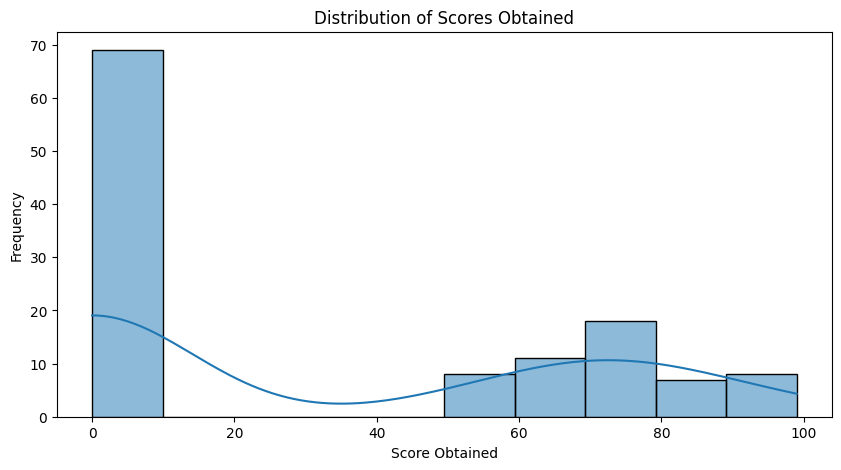

In [87]:
# Step 4: Data Visualization
# Distribution of Scores
plt.figure(figsize=(10, 5))
sns.histplot(df["ScoreObtained"].dropna(), bins=10, kde=True)
plt.title("Distribution of Scores Obtained")
plt.xlabel("Score Obtained")
plt.ylabel("Frequency")
plt.show()


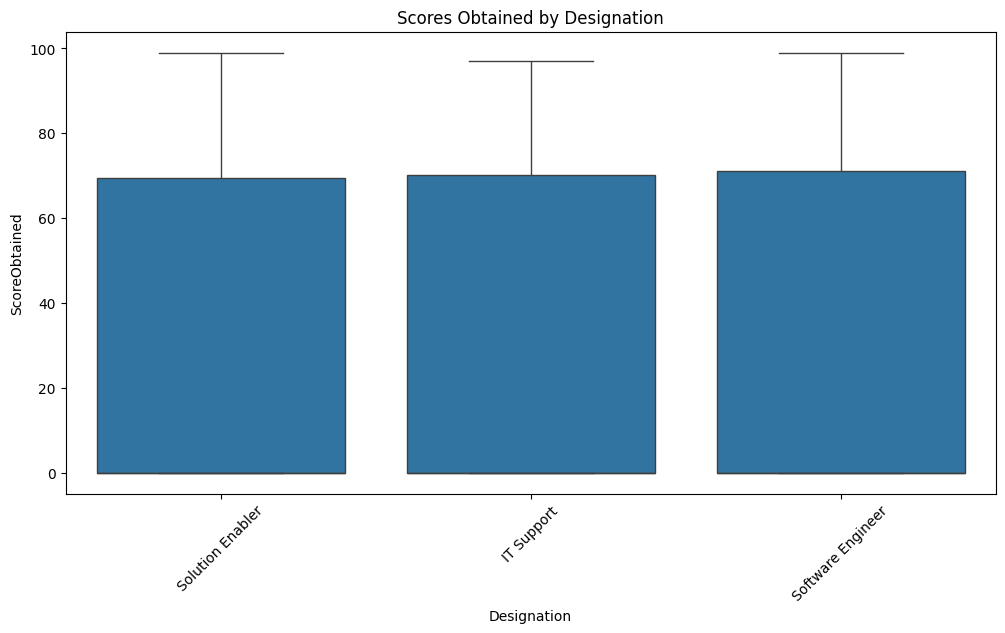

In [88]:
# Box plot of scores by Designation
plt.figure(figsize=(12, 6))
sns.boxplot(x="Designation", y="ScoreObtained", data=df)
plt.title("Scores Obtained by Designation")
plt.xticks(rotation=45)
plt.show()


In [89]:
# Step 5: Feature Engineering (if needed)
# Example: Convert 'YearOfJoining' to age of the employee in the company
df["YearsInCompany"] = 2024 - df["YearOfJoining"]


In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EmployeeID       121 non-null    object 
 1   Firstname        121 non-null    object 
 2   Lastname         121 non-null    object 
 3   Designation      121 non-null    object 
 4   YearOfJoining    121 non-null    int64  
 5   CourseName       121 non-null    object 
 6   Proficiency      121 non-null    object 
 7   SkillType        121 non-null    object 
 8   CertificateLink  69 non-null     object 
 9   ScoreObtained    121 non-null    float64
 10  ScoreCategory    52 non-null     object 
 11  Verified         121 non-null    bool   
 12  YearsInCompany   121 non-null    int64  
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 11.6+ KB
None


In [91]:
avg_score_by_designation = (
    df.groupby("Designation")["ScoreObtained"].mean().reset_index()
)
print(avg_score_by_designation)


         Designation  ScoreObtained
0         IT Support      34.656250
1  Software Engineer      31.119403
2   Solution Enabler      27.590909


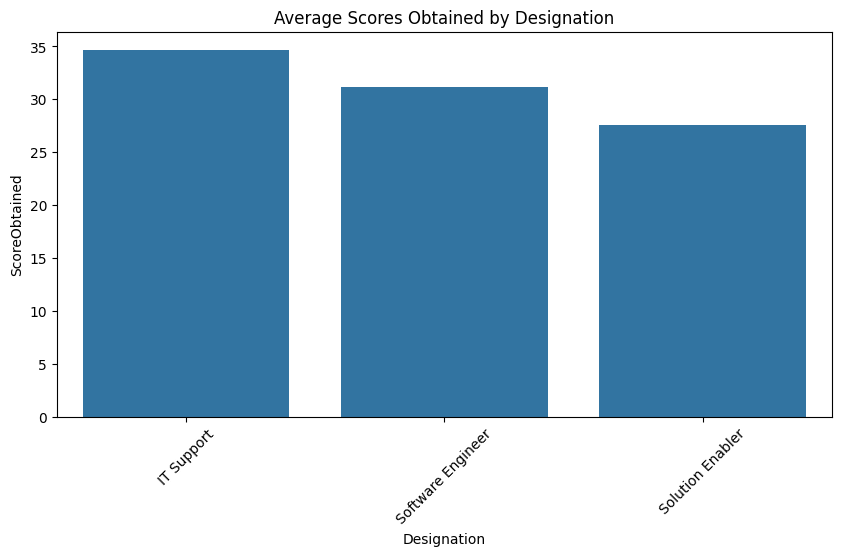

In [92]:
# Visualization of average scores by designation
plt.figure(figsize=(10, 5))
sns.barplot(x="Designation", y="ScoreObtained", data=avg_score_by_designation)
plt.title("Average Scores Obtained by Designation")
plt.xticks(rotation=45)
plt.show()


In [93]:
df.head()


,EmployeeID,Firstname,Lastname,Designation,YearOfJoining,CourseName,Proficiency,SkillType,CertificateLink,ScoreObtained,ScoreCategory,Verified,YearsInCompany
0,JMD301,Donald,Phelps,Solution Enabler,2022,Cloud Security Basics,Basic,ASSESSMENT,NaN,99.0,Excellent,False,2
1,JMD301,Donald,Phelps,Solution Enabler,2022,Data Lakes and Big Data Systems,Advanced,ASSESSMENT,NaN,68.0,Average,True,2
2,JMD301,Donald,Phelps,Solution Enabler,2022,Data Science Fundamentals,Basic,CERTIFICATE,http://example.com/certificate/JMD301/37,0.0,NaN,True,2
3,JMD301,Donald,Phelps,Solution Enabler,2022,ETL Processes and Tools,Advanced,CERTIFICATE,http://example.com/certificate/JMD301/29,0.0,NaN,True,2
4,JMD302,Karen,Lee,Solution Enabler,2022,HTML5 Fundamentals,Basic,CERTIFICATE,http://example.com/certificate/JMD302/15,0.0,NaN,True,2


In [94]:
# Unique counts of employees, courses, and score categories
unique_employees = df["EmployeeID"].nunique()
unique_courses = df["CourseName"].nunique()
unique_score_categories = df["ScoreCategory"].nunique()

print(f"Unique Employees: {unique_employees}")
print(f"Unique Courses: {unique_courses}")
print(f"Unique Score Categories: {unique_score_categories}")


Unique Employees: 20
Unique Courses: 57
Unique Score Categories: 5


In [95]:
# Count of Assessments and Certificates per Employee
employee_assessment_cert_count = (
    df.groupby("EmployeeID")
    .agg(
        TotalAssessments=(
            "ScoreObtained",
            lambda x: (df.loc[x.index, "SkillType"] == "ASSESSMENT").sum(),
        ),
        TotalCertificates=(
            "ScoreObtained",
            lambda x: (df.loc[x.index, "SkillType"] == "CERTIFICATE").sum(),
        ),
    )
    .reset_index()
)

# Overview of assessments and certificates
print(employee_assessment_cert_count.head())


  EmployeeID  TotalAssessments  TotalCertificates
0     JMD301                 2                  2
1     JMD302                 1                  5
2     JMD303                 3                  3
3     JMD304                 3                  2
4     JMD305                 2                  3


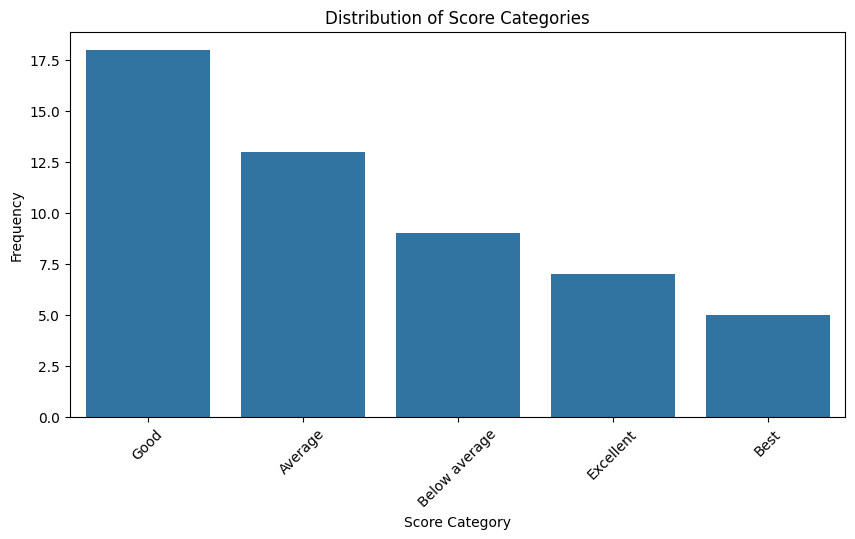

In [96]:
# Distribution of Score Categories
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x="ScoreCategory", order=df["ScoreCategory"].value_counts().index
)
plt.title("Distribution of Score Categories")
plt.xlabel("Score Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


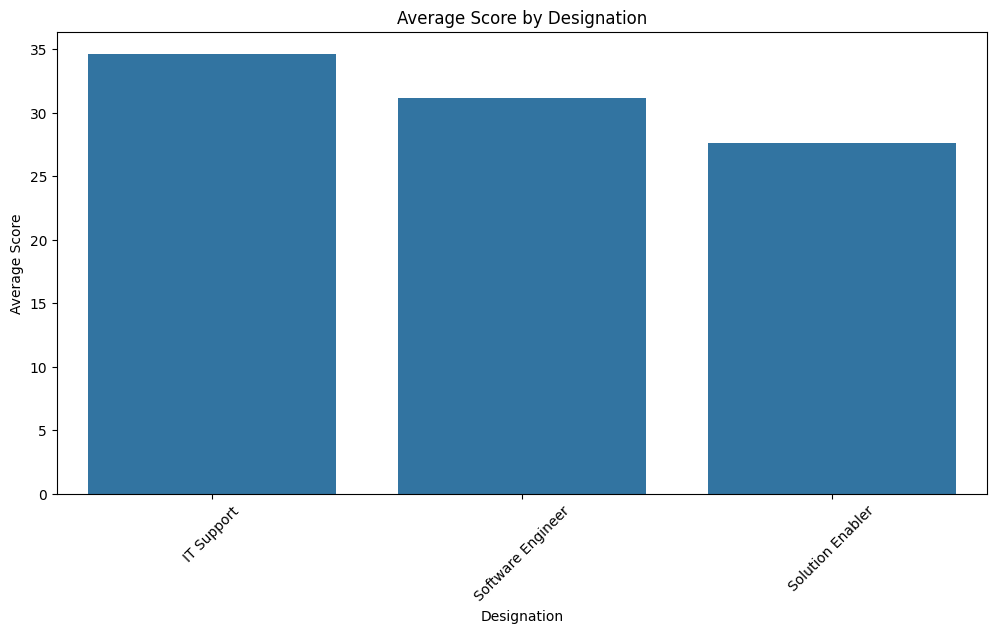

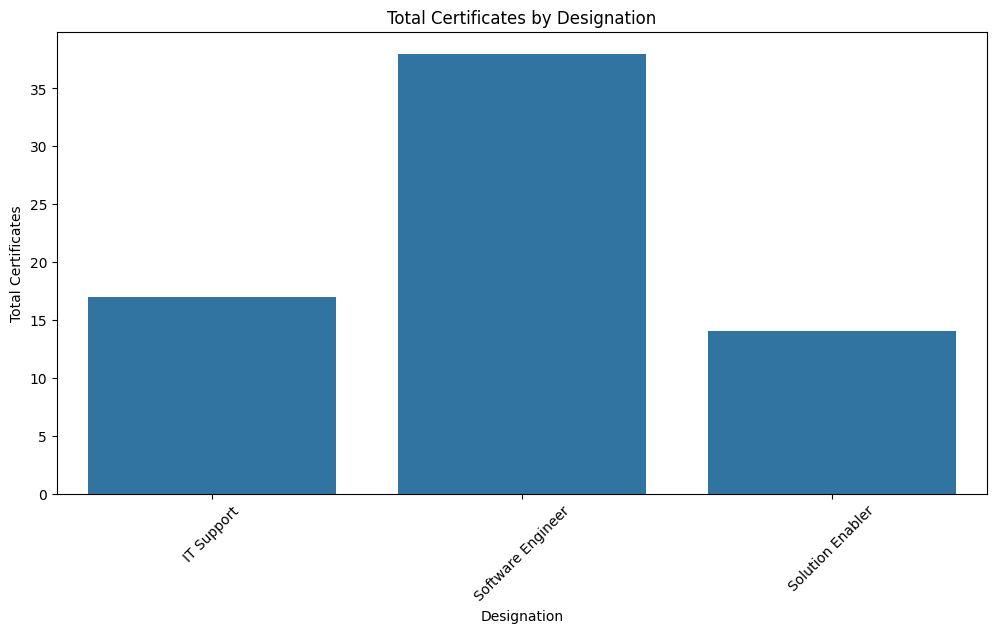

In [97]:
# Average Score Obtained by Designation
avg_score_by_designation = (
    df.groupby("Designation")
    .agg(
        AverageScore=("ScoreObtained", "mean"),
        TotalCertificates=("SkillType", lambda x: (x == "CERTIFICATE").sum()),
    )
    .reset_index()
)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_by_designation, x="Designation", y="AverageScore")
plt.title("Average Score by Designation")
plt.xlabel("Designation")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_by_designation, x="Designation", y="TotalCertificates")
plt.title("Total Certificates by Designation")
plt.xlabel("Designation")
plt.ylabel("Total Certificates")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

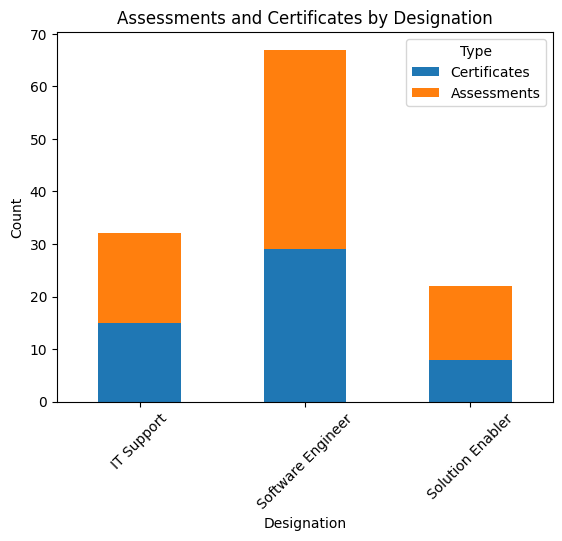

In [98]:
# Assessments vs Certificates by Designation
role_assessment_cert_count = (
    df.groupby("Designation")
    .agg(
        TotalAssessments=("SkillType", lambda x: (x == "ASSESSMENT").sum()),
        TotalCertificates=("SkillType", lambda x: (x == "CERTIFICATE").sum()),
    )
    .reset_index()
)

# Visualization
plt.figure(figsize=(12, 6))
role_assessment_cert_count.set_index("Designation").plot(kind="bar", stacked=True)
plt.title("Assessments and Certificates by Designation")
plt.xlabel("Designation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type", labels=["Certificates", "Assessments"])
plt.show()
